# Evaluacion Modelo LDA

In [1]:
from pycaret.nlp import *
import cargar_corpus
import pickle


session_id = 20521

import os
# define the name of the directory to be created
path = "../Experimentos Modelos/LDA/" + "exp-" + str(session_id) +"/"

try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)
    
    
    
ruta_dataset = "F:/Memoria/Dataset/PDF"
#ruta_dataset = "../Dataset/PDF"
ruta_modelo = path + "LDA-Model"

dataframe = cargar_corpus.getDataframe_pdf(ruta_dataset)

#data = dataframe

random_state = session_id
sample = int(dataframe.shape[0]*.8)
data = dataframe.sample(sample, random_state=random_state).reset_index(drop=True)
data_unseen = dataframe.drop(data.index).reset_index(drop=True)



#Cargar DF de pdf's

#path_exp = "../Experimentos Modelos/train_data/"
#data_train_dir = path_exp + "data_train.df"
#data_test_dir = path_exp + "data_test.df"

#data = pickle.load(open(data_train_dir, 'rb'))
#data_unseen = pickle.load(open(data_test_dir, 'rb'))

Successfully created the directory ../Experimentos Modelos/LDA/exp-20521/ 


mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
m

se importa el modulo `pycaret.nlp` para el procesamiento del lenguaje narutal

In [2]:
custom_stopwords = ['use', 'fig', 'figure' , 'value', 'www', 'org', 'also', 'model', 'ch', 'er_al', 'research', 'researchgate_net', 'year', 
                    'upwelle','however', 'ca','slr','area','sir','reference','page','may','table','show','study',
                    'therefore','thus','may','term','low','sample','result','test','author','prepare','report','que','set',
                    'column','moreover','find','read','total','author_funder_granted_biorxiv','holder_preprint_peer_reviewe',
                    'licence_display_preprint_perpetuity','rights_reserved_reuse_allowe','biorxiv_preprint_first_poste',
                    'content_courtesy_springer_nature','terms_apply_rights_reserve','university_chicago_press','conditions_http_journal',
                    'content_downloaded_march_subject','reviews_aquaculture_author','reviews_aquaculture_published_john','publication',
                    'time','funder_granted_biorxiv_license','display_preprint_perpetuity_right','authors_publication_working_relate',
                    'reserved_reuse_allowed_without',
                    'user_requested_enhancement_downloaded','view_project_content_followe','upload','international_license_permit',
                    'sharing_adaptation_distribution_reproduction','claims_published_maps_institutional',
                    'creative_commons_license','intended_permitted_statutory_regulation','exceeds_permitted_need','open_acces_article_license',
                    'creative_commons_attribution','international_license_permit','copyright_holder_view','preprints_preprints_peer_reviewe',
                    'preprint','posted_june_doi','university_concepcion_publications_citation','deem',
                    'publications_citations_publications_citation','authors_working_related_projects','synthesis','introduction','owe',
                    'scientific','average','september_user_requeste','source','type','old','field','single','day',
                    'https_researchgate_net','victor_roberto_parra_sanchez','university_concepcion','universidad','related_project',
                    'view_project','january_user_requested','profile','student', 'manuel', 'professor_department','dynamic', 'calculation',
                    'general', 'context', 'valid', 'experimental','eq','email','citations_reads_authors_include',         
                    
                    
                    'article', 'technology', 'citations_reads_authors_include', 'university_concepcion_publications_citation', 
                    'katia_saez_university_concepcion','katia_saez_university_publication',
                    'authors_working_related_project', 'view_project_content_following', 'puerto', 'file', 'registered_office_mortimer_house',
                    'wt', 'environmental', 'detail', 'include', 'instruction', 'authors_subscription', 'information', 'doi_citations_read',
                    'authors_include',
                    'faculty', 'department','whatsoever_howsoever_cause', 'arising_directly_indirectly','access', 'found_http_tandfonline',
                    'com', 'condition','received_august_accepte','concepcion','box', 'plot',
                    
                    'able', 'others','above-mentioned otherwise','accordingly', 'overall','across', 'rather','along', 'remarkably','already',
                    'significantly', 'alternatively simply','always sometimes','among specifically','and','or', 'straight', 'forward','anything',
                    'substantially', 'anywhere', 'thereafter','better', 'therebetween','disclosure', 'therefor','due','therefrom', 'easily', 'therein', 'easy',
                    'thereinto+','eg', 'thereon', 'either', 'therethrough','university','whatsoever','distribution_form_anyone',
                    'expressly_forbidden','follow', 'additionally', 'analysis','distribution',
                    'elsewhere', 'therewith','enough','together','especially', 'toward',  'essentially', 'towards','et al','typical', 'etc', 'typically',
                    'eventually', 'upon', 'excellent', 'via', 'finally', 'vice versa',
                    'furthermore', 'whatever','good', 'whereas','hence', 'whereat','he','she', 'wherever','him','her', 'whether','his','her',
                    'whose','ie', 'within', 'ii', 'without', 'iii', 'yet', 'instead', 'later', 'like', 'little', 'many', 'may', 'meanwhile',
                    'might','moreover','much','must','never','often','line','phase','cycle',
                    
                    'increase', 'effect', 'induce', 'activity', 'estimate', 'high', 'unit', 'download', 'material', 'follow', 'example', 'level', 
                    'variable', 'see', 'present', 'citation', 'distribution', 'equation', 'document', 'paper', 'citation_recomendation', 'pag',
                    'stre', 'non', 'enchufetv', 'solution', 'problem', 'method', 'function', 'case', 'consider', 'order', 'give', 'obtain', 'theorem',
                    'define','process','system', 'section', 'numerical', 'first', 'second', 'error', 'base', 'element',
                    'item', 'measurement','could', 'need', 'datum', 'image', 'let', 'assume', 'proof', 'denote', 'constant', 'unknown',

                    'review', 'publish', 'copyright', 'abstract', 'factor', 

                    
                    
]

# Configuración del entorno en PyCaret

La funcion `setup()` inicializa el entorno de desarrollo de `PyCaret` y aplica automaticamente el preprocesado de textos.

- `Removing Numerical Charecters`
- `Removing Special Characters`
- `Tokenizing Words`
- `Removing Stopwords`
- `Extracting Bigrams`
- `Extracting Trigrams`
- `Removing Custom Stopwords`
- `Lemmatizing`
- `Stemming`

In [3]:
train_lda = setup(data = data, target = 'text', session_id = session_id, custom_stopwords = custom_stopwords)

train_data_ = get_config('data_') #pandas.DataFrame containing text after all processing
train_tokenized_words = get_config('text') #Tokenized words as a list with length = # documents
train_corpus = get_config('corpus') #List containing tuples of id to word mapping
train_id2word = get_config('id2word')

train_data_dir = path + "train_data_.sav"
train_tokenized_words_dir = path + "train_tokenized_words.sav"
train_corpus_dir = path + "train_corpus.sav"
train_id2word_dir = path + "train_id2word.sav"

pickle.dump(train_data_, open(train_data_dir, 'wb'))
pickle.dump(train_tokenized_words, open(train_tokenized_words_dir, 'wb'))
pickle.dump(train_corpus, open(train_corpus_dir, 'wb'))
pickle.dump(train_id2word, open(train_id2word_dir, 'wb'))

Description,Value
session_id,20521
Documents,969
Vocab Size,78899
Custom Stopwords,True


# Evaluación del modelo

Muchos modelos de temas, incluido `LDA`, son modelos probabilísticos, que proporcionan una representación de temas tanto predictiva como latente. En general, se asume que los resultados generados por estos modelos son significativos y útiles y, debido a su proceso de entrenamiento no supervisado, es difícil evaluar esos supuestos.

Sin embargo, es igualmente importante identificar si un modelo entrenado es objetivamente bueno o malo, así como tener la capacidad de comparar diferentes modelos / métodos. Para hacerlo, se necesitaría una medida objetiva de la calidad.

Tradicionalmente, y todavía para muchas aplicaciones prácticas, para evaluar si se ha aprendido "lo correcto" sobre el corpus, se utilizan enfoques de conocimiento implícito y "eyeballing". Idealmente, nos gustaría capturar esta información en una única métrica que se pueda maximizar y comparar. Los enfoques que se utilizan comúnmente en la actualidad:

- Modelos Eye Balling: mire las N palabras principales, temas / documentos, etc.

- Métricas de evaluación intrínsecas: interpretabilidad y semántica del modelo

- Métricas de evaluación extrínseca: es un modelo bueno para realizar tareas predefinidas, como la clasificación

- Juicios humanos: ¿El modelo temático mejora su comprensión del problema?

En esta sección se evalua el valor de coherencia de un modelo de tema usando la función `tune_model()`.

# Evaluación intrínseca mediante el valor de coherencia

Las medidas de coherencia de tema puntúan un solo tema midiendo el grado de similitud semántica entre las palabras de puntuación alta en el tema. Estas medidas ayudan a distinguir entre temas que son semánticamente interpretables y temas que son producto de inferencia estadística. La función `tune_model()` itera en una cuadrícula predefinida con diferente número de temas y crea un modelo para cada parámetro. Luego, la coherencia de los temas se evalúa para diferentes modelos y se presenta visualmente en un gráfico con la puntuación de coherencia en el eje y en función de los # temas en el eje x.

El modelo con la puntuación de coherencia más alta es el mejor modelo basado en criterios de evaluación intrínsecos. Por muy atractivo que pueda parecer, el rendimiento de un modelo de tema no se puede capturar en un número, es decir, la puntuación de coherencia, no viene sin sus desventajas. 

Solo se ha cubierto Coherence en esta Memoria. La otra medida popular es la perplejidad. Captura cuán sorprendido está un modelo de nuevos datos que no ha visto antes, y se mide como la probabilidad logarítmica normalizada de un conjunto de pruebas retenido. Centrándose en la parte de probabilidad logarítmica, se puede pensar en la métrica de perplejidad como una medida de la probabilidad de que se den algunos datos nuevos no vistos en el modelo que se aprendió anteriormente. Es decir, qué tan bien representa o reproduce el modelo las estadísticas de los datos retenidos. Sin embargo, estudios recientes han demostrado que la probabilidad predictiva (o lo que es lo mismo, la perplejidad) y el juicio humano a menudo no están correlacionados, e incluso a veces están ligeramente correlacionados, ya que la optimización de la perplejidad puede no producir temas interpretables por humanos. 

In [4]:
custom_grid = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,48,64]

tuned_unsupervised = tune_model(model = 'lda', custom_grid = custom_grid ,multi_core = True)

save_model(tuned_unsupervised, ruta_modelo)

IntProgress(value=0, description='Processing: ', max=28)

Output()

Best Model: Latent Dirichlet Allocation | # Topics: 12 | Coherence: 0.4673
Model Succesfully Saved


(<gensim.models.ldamulticore.LdaMulticore at 0x25c7c7ca788>,
 '../Experimentos Modelos/LDA/exp-20521/LDA-Model.pkl')

In [16]:
evaluate_model(tuned_unsupervised)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [5]:
plot_model(tuned_unsupervised, plot = 'topic_distribution')

In [6]:
evaluate_model(tuned_unsupervised)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [7]:
num_topics = len(tuned_unsupervised.get_topics())
num_words = 25

topics = tuned_unsupervised.show_topics(formatted=True, num_topics=num_topics, num_words=num_words)

import pandas as pd

topics_train = [tuned_unsupervised[train_corpus[i]] for i in range(len(train_data_))]

def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

document_topic_matrix = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics_train]) \
  .reset_index(drop=True).fillna(0)

document_topic_matrix_dir = path + "document_topic_matrix.sav"
pickle.dump(document_topic_matrix, open(document_topic_matrix_dir, 'wb'))


topic_word_matrix = pd.DataFrame(tuned_unsupervised.get_topics(), columns=tuned_unsupervised.id2word.values(), index=[i for i in range(num_topics)])
topic_word_matrix_dir = path + "topic_word_matrix.sav"
pickle.dump(topic_word_matrix, open(topic_word_matrix_dir, 'wb'))


lda_train_results = assign_model(tuned_unsupervised)
lda_train_results = lda_train_results.drop(columns=['text'])
lda_train_results_dir = path + "hdp_train_results.df"
pickle.dump(lda_train_results, open(lda_train_results_dir, 'wb'))

In [8]:
#topic_num = 'Topic 11'

#print(topics[11][1])

plot_model(tuned_unsupervised, plot = 'topic_distribution')
#plot_model(tuned_unsupervised, plot = 'wordcloud', topic_num = topic_num)
#plot_model(tuned_unsupervised, plot = 'frequency', topic_num = topic_num)
#plot_model(tuned_unsupervised, plot = 'distribution', topic_num = topic_num)
#plot_model(tuned_unsupervised, plot = 'sentiment', topic_num = topic_num)
#plot_model(tuned_unsupervised, plot = 'pos', topic_num = topic_num)
#plot_model(tuned_unsupervised, plot = 'bigram', topic_num = topic_num)
#plot_model(tuned_unsupervised, plot = 'trigram', topic_num = topic_num)

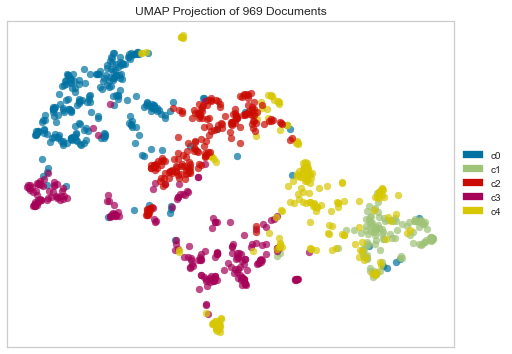

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10     0.124975  0.202245       1        1  14.919027
9     -0.017597 -0.226530       2        1  14.373495
8     -0.048934 -0.069243       3        1  14.278962
1     -0.107357  0.084958       4        1  12.569806
0      0.158668 -0.114643       5        1  11.295642
5      0.025452 -0.089336       6        1   8.710935
3      0.025869  0.194556       7        1   7.011816
11    -0.070115 -0.127852       8        1   5.257964
6     -0.208050 -0.035630       9        1   3.620590
7      0.169593  0.071338      10        1   3.402152
4      0.195455 -0.030729      11        1   3.232149
2     -0.247959  0.140866      12        1   1.327463, topic_info=             Term          Freq         Total Category  logprob  loglift
417         plant   4848.000000   4848.000000  Default  30.0000  30.0000
716          cell  10035.000000  10035.000000  Default  29.0000  29.0000
2899       specie   5373.000000   5373.000000  Default  28.0000  28.0000
3177   production   3433.000000   3433.000000  Default  27.0000  27.0000
471        region   4902.000000   4902.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
1283  application     65.411500   2705.892086  Topic12  -5.9287   0.5994
409   performance     56.459031   1775.175183  Topic12  -6.0758   0.8738
195      evidence     54.515780   1501.107820  Topic12  -6.1109   1.0064
1179     standard     50.999100   1343.356152  Topic12  -6.1775   1.0508
555     structure     50.387928   4061.013287  Topic12  -6.1896  -0.0675

[1062 rows x 6 columns], token_table=       Topic      Freq                 Term
term                                       
6622       7  0.987119              abortus
22214      1  0.984957                 abos
42567      4  0.245355          absenteeism
42567     12  0.719707          absenteeism
4933       1  0.068959            abundance
...      ...       ...                  ...
1266      12  0.002136                yield
15979      3  0.031373  yield_fiber_quality
15979     10  0.909816  yield_fiber_quality
35558      5  0.981353              zeolite
11674      3  0.983731                zonal

[4900 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 10, 9, 2, 1, 6, 4, 12, 7, 8, 5, 3])

In [9]:
plot_model(tuned_unsupervised, plot = 'tsne')

plot_model(tuned_unsupervised, plot = 'umap')

plot_model(tuned_unsupervised, plot = 'topic_model')

<AxesSubplot:>

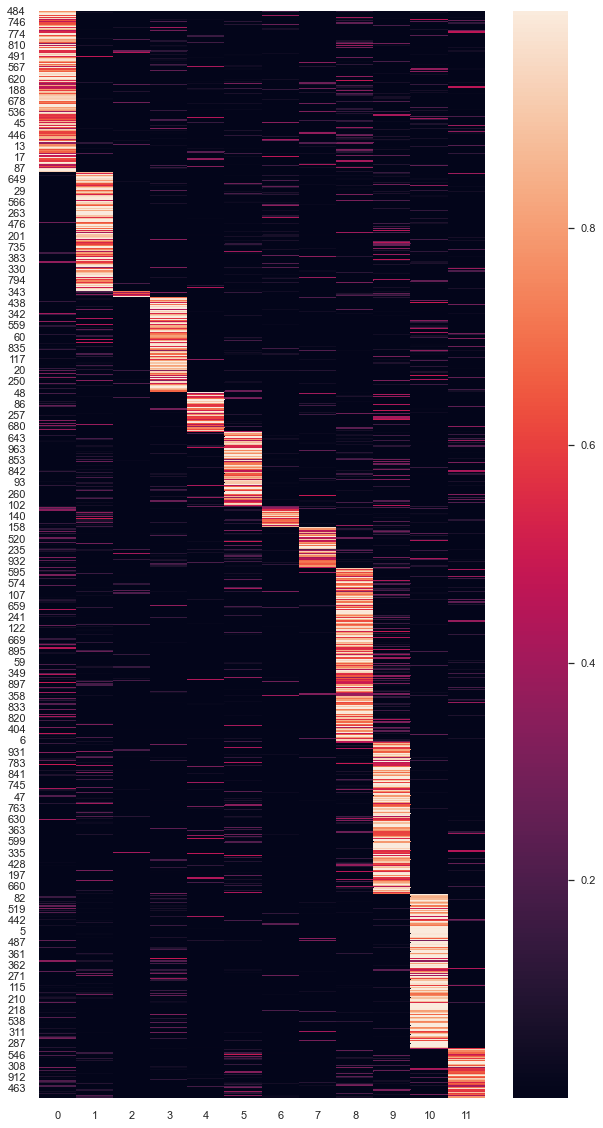

In [10]:
%matplotlib inline
import seaborn as sns; sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(document_topic_matrix.loc[document_topic_matrix.idxmax(axis=1).sort_values().index])

<AxesSubplot:>

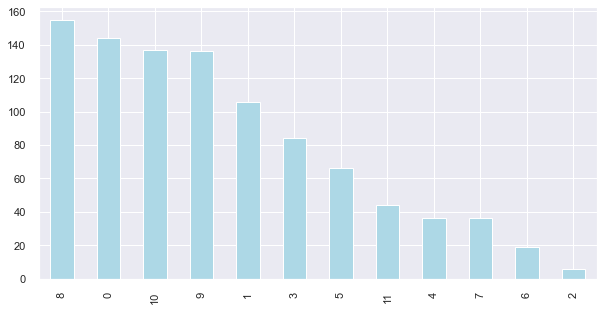

In [11]:
sns.set(rc={'figure.figsize':(10,5)})
document_topic_matrix.idxmax(axis=1).value_counts().plot.bar(color='lightblue')

In [12]:
document_topic_matrix

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000054,0.000111,0.000054,0.069726,0.000054,0.867064,0.007688,0.000054,0.048785,0.006306,0.000054,0.000054
1,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.999550,0.000041
2,0.464090,0.000057,0.000057,0.000057,0.000057,0.000057,0.405558,0.000057,0.055813,0.074087,0.000057,0.000057
3,0.326575,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.672884,0.000054,0.000054,0.000054
4,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.999534,0.000042
...,...,...,...,...,...,...,...,...,...,...,...,...
964,0.000029,0.012064,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.987650,0.000029
965,0.000043,0.000043,0.000043,0.199972,0.000043,0.000043,0.000043,0.645295,0.000043,0.154347,0.000043,0.000043
966,0.840472,0.000119,0.000119,0.022092,0.007601,0.000119,0.000119,0.000119,0.075138,0.000119,0.053865,0.000119
967,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.999390,0.000055,0.000055


In [13]:
topic_word_matrix

,accessibility,accord,accuracy,action,adaptation,add,addition,address,adjacent,affect,...,kallweit,lower_glauconitic_zone,ortiz_abarca_del_rio,permitira,pioneering,seismically_thin,shale,sismico,valeortizbusto,widess
0,0.000035,0.001848,0.000196,0.000211,0.000171,0.001559,0.001657,0.000098,0.000050,0.001825,...,4.014862e-07,4.014870e-07,4.014864e-07,4.014862e-07,4.014862e-07,4.014866e-07,4.014862e-07,4.014862e-07,4.014862e-07,4.014868e-07
1,0.000240,0.002174,0.000216,0.002973,0.001075,0.000591,0.000765,0.000728,0.000020,0.001258,...,3.532533e-07,3.532533e-07,3.532533e-07,3.532533e-07,3.532533e-07,3.532533e-07,3.532533e-07,3.532533e-07,3.532533e-07,3.532533e-07
2,0.000008,0.000301,0.000029,0.000379,0.000312,0.000209,0.000221,0.000099,0.000004,0.000936,...,2.589471e-06,2.589471e-06,2.589471e-06,2.589471e-06,2.589471e-06,2.589471e-06,2.589471e-06,2.589471e-06,2.589471e-06,2.589471e-06
3,0.000038,0.001348,0.000171,0.000919,0.000221,0.001253,0.001961,0.000185,0.000107,0.000968,...,6.206002e-07,6.206005e-07,6.206002e-07,6.206002e-07,6.206002e-07,6.206004e-07,6.206002e-07,6.206002e-07,6.206002e-07,6.206004e-07
4,0.000130,0.001299,0.000029,0.000142,0.000453,0.000534,0.001143,0.000218,0.000079,0.001047,...,1.216068e-06,1.216068e-06,1.216068e-06,1.216068e-06,1.216068e-06,1.216068e-06,1.216068e-06,1.216068e-06,1.216068e-06,1.216068e-06
5,0.000251,0.001433,0.000325,0.001077,0.000292,0.000343,0.000837,0.000711,0.000303,0.001357,...,5.146824e-07,5.146824e-07,5.146824e-07,5.146824e-07,5.146824e-07,5.146824e-07,5.146824e-07,5.146824e-07,5.146824e-07,5.146824e-07
6,0.000021,0.001390,0.000442,0.000602,0.000040,0.000650,0.002440,0.001493,0.000005,0.000845,...,1.158820e-06,1.158820e-06,1.158820e-06,1.158820e-06,1.158820e-06,1.158820e-06,1.158820e-06,1.158820e-06,1.158820e-06,1.158820e-06
7,0.000007,0.001978,0.000046,0.000496,0.000163,0.000899,0.001792,0.000223,0.000050,0.001782,...,1.240092e-06,1.240092e-06,1.240092e-06,1.240092e-06,1.240092e-06,1.240092e-06,1.240092e-06,1.240092e-06,1.240092e-06,1.240092e-06
8,0.000005,0.001854,0.000311,0.000311,0.000124,0.000343,0.001087,0.000329,0.000262,0.001133,...,3.068116e-07,3.083002e-07,3.071704e-07,3.068116e-07,3.068116e-07,3.075378e-07,3.068116e-07,3.068116e-07,3.068116e-07,3.079143e-07
9,0.000030,0.001363,0.000972,0.000203,0.000097,0.001130,0.001176,0.000719,0.000171,0.000510,...,3.146006e-07,3.150262e-07,3.147055e-07,3.146006e-07,3.146006e-07,3.148115e-07,3.146006e-07,3.146006e-07,3.146006e-07,3.149183e-07


In [14]:
lda_train_results

,document_title,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Dominant_Topic,Perc_Dominant_Topic
0,Monitoring the Change in Urban Vegetation in 1...,0.000054,0.000592,0.000054,0.069630,0.000054,0.867187,0.007234,0.000054,0.048741,0.006295,0.000054,0.000054,Topic 5,0.87
1,Advantages in Wound Healing Process in Female ...,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.999550,0.000041,Topic 10,1.00
2,Influence of aramid fibers on the mechanical b...,0.464115,0.000057,0.000057,0.000057,0.000057,0.000057,0.405560,0.000057,0.055729,0.074143,0.000057,0.000057,Topic 0,0.46
3,Effect of Heat Treatments and SiC Content in t...,0.326577,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.672882,0.000054,0.000054,0.000054,Topic 8,0.67
4,Insulin Restores Gestational Diabetes Mellitus...,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.999534,0.000042,Topic 10,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,Role of Extracellular Vesicles and microRNAs o...,0.000029,0.012068,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.987645,0.000029,Topic 10,0.99
965,QTL Analysis of Transgressive Nematode Resista...,0.000043,0.000043,0.000043,0.199973,0.000043,0.000043,0.000043,0.645294,0.000043,0.154347,0.000043,0.000043,Topic 7,0.65
966,Green synthesis of silver nanoparticles from l...,0.840466,0.000119,0.000119,0.022091,0.007609,0.000119,0.000119,0.000119,0.075137,0.000119,0.053865,0.000119,Topic 0,0.84
967,Numerical solution of stochastic master equati...,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.999390,0.000055,0.000055,Topic 9,1.00


In [15]:
#guardar df test

data_train_dir = path + "data_train.df"

pickle.dump(data, open(data_train_dir, 'wb'))

data_unseen_dir = path + "data_test.df"

pickle.dump(data_unseen, open(data_unseen_dir, 'wb'))


https://github.com/FelixChop/MediumArticles/blob/master/LDA-BBC.ipynb

In [ ]:
sadasd